In [1]:
#8. Аппроксимируйте данную зависимость полиномом второй степени с помощью нейронной сети.
import random
import numpy as np
import math

In [2]:
X = np.array([0,1,2,3,4,5,6,7,8])
Y = np.array([6.45, 4.06, 2.53, 2.05, 2.48, 3.97, 6.57, 9.94, 14.45])

In [3]:
def initialize_with_zeros(dim):
    np.random.seed(0)
    w1 = random.uniform(-10, 10)
    w2 = random.uniform(-10, 10)
    b = random.uniform(-10, 10)
    return w1, w2, b
  
def optimize(w1, w2, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        # Вычисление градиента и функции стоимости
        m = X.shape[0]
        A = w1*X + w2 * (X ** 2) + b
        #print(A)
        cost = math.sqrt(np.sum((A-Y) ** 2) / m)
        
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw1 = np.mean(2*X*(A-Y))/cost
        dw2 = np.mean(2*(X ** 2) *(A-Y))/cost
        db = np.mean(2*(A-Y))/cost
        
        # обновление весов
        w1 = w1 - learning_rate * dw1
        w2 = w2 - learning_rate * dw2
        b = b - learning_rate * db
        
        if i % 10000 == 0:
            costs.append(cost)
        
        if i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w1": w1,
              "w2": w2,
              "b": b}
    
    grads = {"dw1": dw1,
             "dw2": dw2,
             "db": db}
    
    return params, grads, costs

In [4]:
dim = X.size
w1, w2, b = initialize_with_zeros(dim)
params, grads, costs = optimize(w1, w2, b, X, Y, num_iterations = 100000, learning_rate = 0.0005)
print("         ", params["w1"])
pw1 = params["w1"]
pw2 = params["w2"]
pb = params["b"]
Ypred = np.array([round(pw1*X[i] + pw2*(X[i] ** 2) + pb, 3) for i in range(len(Y))])
print(Ypred)
print(Y)

Cost after iteration 0: 310.604196
Cost after iteration 10000: 2.881107
Cost after iteration 20000: 1.477749
Cost after iteration 30000: 0.498232
Cost after iteration 40000: 0.498252
Cost after iteration 50000: 0.498252
Cost after iteration 60000: 0.498252
Cost after iteration 70000: 0.498252
Cost after iteration 80000: 0.498252
Cost after iteration 90000: 0.498252
          -2.9730488117976224
[ 6.489  4.027  2.589  2.175  2.784  4.416  7.072 10.752 15.455]
[ 6.45  4.06  2.53  2.05  2.48  3.97  6.57  9.94 14.45]


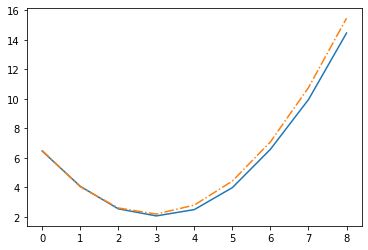

In [5]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '-', X, Ypred, '-.')